<a href="https://colab.research.google.com/github/Qasim-Shah-73/RevoultDetectFraud/blob/main/DetectFraudEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Adjust the file path based on the location of your dataset
fraudsters_path = '/content/drive/MyDrive/Colab Notebooks/Applied AI/DL/FraudDataset/output.csv'
final_data = pd.read_csv(fraudsters_path)

final_data = final_data.drop(['IS_FRAUDSTER'], axis=1)
mapping = {'True': 1, 'No': 0}
final_data['is_bank_holiday'] = final_data['is_bank_holiday'].map(mapping)

# Reset the index
final_data = final_data.reset_index(drop=True)

X = final_data.iloc[:, :9].join(final_data.iloc[:, -81:])
y = final_data.iloc[:, 9]   # Target in column 9


# Convert features to NumPy array
X_array = X.values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_array)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


<ipython-input-4-af93fcc518a4>:25: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv(fraudsters_path)


X_train shape: (838860, 90)
X_test shape: (209715, 90)
y_train shape: (838860,)
y_test shape: (209715,)


Epoch 1/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5718 - val_loss: 0.5740
Epoch 2/10
20972/20972 [==============================] - 52s 2ms/step - loss: 0.5588 - val_loss: 0.5739
Epoch 3/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5588 - val_loss: 0.5739
Epoch 4/10
20972/20972 [==============================] - 46s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 5/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 6/10
20972/20972 [==============================] - 52s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 7/10
20972/20972 [==============================] - 51s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 8/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 9/10
20972/20972 [==============================] - 49s 2ms/step - loss: 0.5587 - val_loss: 0.5739
Epoch 10/10
20972/20972 [==============================

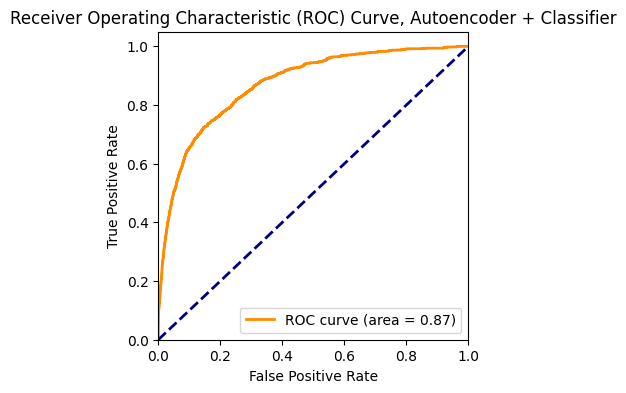

Confusion Matrix at 0.6:
[[208086      0]
 [  1629      0]]

Confusion Matrix at 0.7:
[[208086      0]
 [  1629      0]]


In [ ]:


# Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=16, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32,  =0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5664 - val_loss: 0.5739
Epoch 2/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5586 - val_loss: 0.5737
Epoch 3/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 4/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 5/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5585 - val_loss: 0.5737
Epoch 6/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 7/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 8/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 9/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 10/10
20972/20972 [==============================

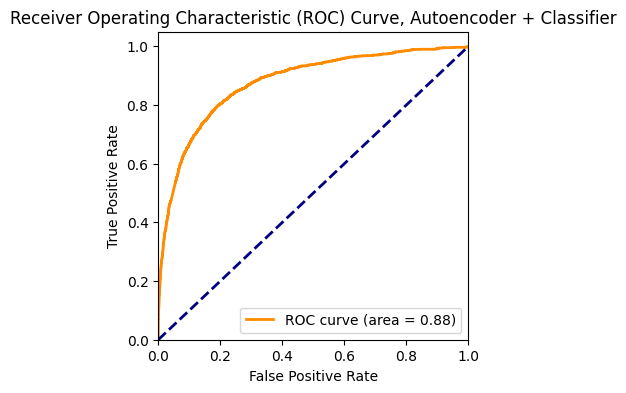

Confusion Matrix at 0.6:
[[208086      0]
 [  1628      1]]

Confusion Matrix at 0.7:
[[208086      0]
 [  1629      0]]


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=32, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 49s 2ms/step - loss: 0.5639 - val_loss: 0.5738
Epoch 2/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5586 - val_loss: 0.5737
Epoch 3/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 4/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5583 - val_loss: 0.5734
Epoch 5/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5582 - val_loss: 0.5733
Epoch 6/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5581 - val_loss: 0.5732
Epoch 7/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5580 - val_loss: 0.5732
Epoch 8/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5580 - val_loss: 0.5732
Epoch 9/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5580 - val_loss: 0.5732
Epoch 10/10
20972/20972 [==============================

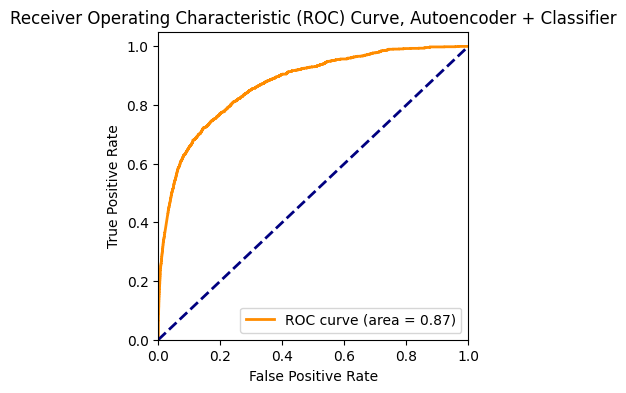

Confusion Matrix at 0.6:
[[208082      4]
 [  1627      2]]

Confusion Matrix at 0.7:
[[208085      1]
 [  1628      1]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=64, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5670 - val_loss: 0.5741
Epoch 2/10
20972/20972 [==============================] - 51s 2ms/step - loss: 0.5587 - val_loss: 0.5737
Epoch 3/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 4/10
20972/20972 [==============================] - 46s 2ms/step - loss: 0.5584 - val_loss: 0.5735
Epoch 5/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5583 - val_loss: 0.5734
Epoch 6/10
20972/20972 [==============================] - 45s 2ms/step - loss: 0.5583 - val_loss: 0.5734
Epoch 7/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5582 - val_loss: 0.5734
Epoch 8/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5582 - val_loss: 0.5734
Epoch 9/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5582 - val_loss: 0.5733
Epoch 10/10
20972/20972 [==============================

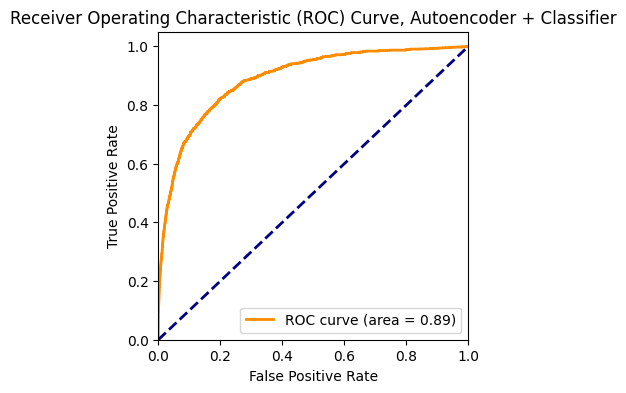

Confusion Matrix at 0.6:
[[208086      0]
 [  1621      8]]

Confusion Matrix at 0.7:
[[208086      0]
 [  1628      1]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=32, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5641 - val_loss: 0.5738
Epoch 2/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5586 - val_loss: 0.5737
Epoch 3/10
20972/20972 [==============================] - 46s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 4/10
20972/20972 [==============================] - 46s 2ms/step - loss: 0.5584 - val_loss: 0.5736
Epoch 5/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5584 - val_loss: 0.5735
Epoch 6/10
20972/20972 [==============================] - 49s 2ms/step - loss: 0.5583 - val_loss: 0.5734
Epoch 7/10
20972/20972 [==============================] - 48s 2ms/step - loss: 0.5583 - val_loss: 0.5734
Epoch 8/10
20972/20972 [==============================] - 49s 2ms/step - loss: 0.5582 - val_loss: 0.5734
Epoch 9/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5582 - val_loss: 0.5733
Epoch 10/10
20972/20972 [==============================

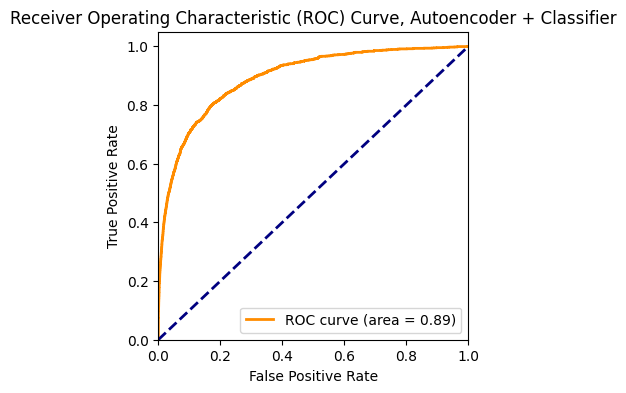

Confusion Matrix at 0.6:
[[208081      5]
 [  1612     17]]

Confusion Matrix at 0.7:
[[208085      1]
 [  1620      9]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=64, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 52s 2ms/step - loss: 0.5663 - val_loss: 0.5738
Epoch 2/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 3/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5585 - val_loss: 0.5736
Epoch 4/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5584 - val_loss: 0.5736
Epoch 5/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5584 - val_loss: 0.5736
Epoch 6/10
20972/20972 [==============================] - 50s 2ms/step - loss: 0.5584 - val_loss: 0.5736
Epoch 7/10
20972/20972 [==============================] - 44s 2ms/step - loss: 0.5584 - val_loss: 0.5735
Epoch 8/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5584 - val_loss: 0.5735
Epoch 9/10
20972/20972 [==============================] - 47s 2ms/step - loss: 0.5584 - val_loss: 0.5735
Epoch 10/10
20972/20972 [==============================

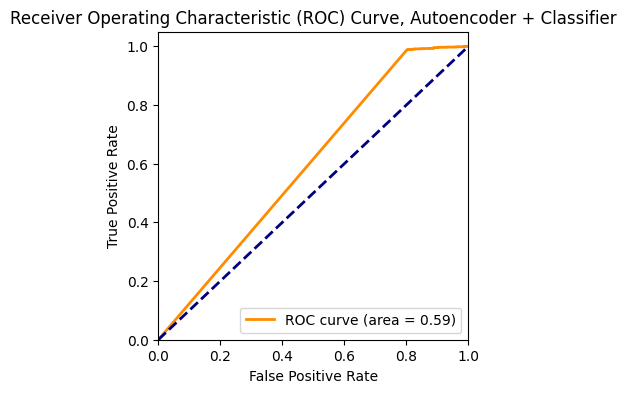

Confusion Matrix at 0.6:
[[208086      0]
 [  1629      0]]

Confusion Matrix at 0.7:
[[208086      0]
 [  1629      0]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=32, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Epoch 1/10
20972/20972 [==============================] - 58s 3ms/step - loss: 0.5982 - val_loss: 0.6105
Epoch 2/10
20972/20972 [==============================] - 55s 3ms/step - loss: 0.5968 - val_loss: 0.6116
Epoch 3/10
20972/20972 [==============================] - 52s 2ms/step - loss: 0.5946 - val_loss: 0.6106
Epoch 4/10
20972/20972 [==============================] - 54s 3ms/step - loss: 0.5950 - val_loss: 0.6113
Epoch 5/10
20972/20972 [==============================] - 52s 2ms/step - loss: 0.5958 - val_loss: 0.6099
Epoch 6/10
20972/20972 [==============================] - 53s 3ms/step - loss: 0.5962 - val_loss: 0.6096
Epoch 7/10
20972/20972 [==============================] - 54s 3ms/step - loss: 0.5947 - val_loss: 0.6096
Epoch 8/10
20972/20972 [==============================] - 59s 3ms/step - loss: 0.5955 - val_loss: 0.6106
Epoch 9/10
20972/20972 [==============================] - 57s 3ms/step - loss: 0.5958 - val_loss: 0.6120
Epoch 10/10
20972/20972 [==============================

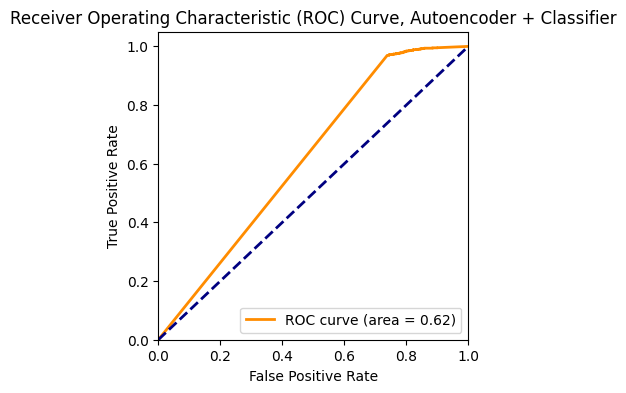

Confusion Matrix at 0.6:
[[208086      0]
 [  1629      0]]

Confusion Matrix at 0.7:
[[208086      0]
 [  1629      0]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=64, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


Fold 1
Epoch 1/10
17477/17477 [==============================] - 54s 3ms/step - loss: 0.5627 - val_loss: 0.5782
Epoch 2/10
17477/17477 [==============================] - 52s 3ms/step - loss: 0.5536 - val_loss: 0.5778
Epoch 3/10
17477/17477 [==============================] - 52s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 4/10
17477/17477 [==============================] - 59s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 5/10
17477/17477 [==============================] - 59s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 6/10
17477/17477 [==============================] - 51s 3ms/step - loss: 0.5534 - val_loss: 0.5778
Epoch 7/10
17477/17477 [==============================] - 51s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 8/10
17477/17477 [==============================] - 58s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 9/10
17477/17477 [==============================] - 59s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 10/10
17477/17477 [=======================

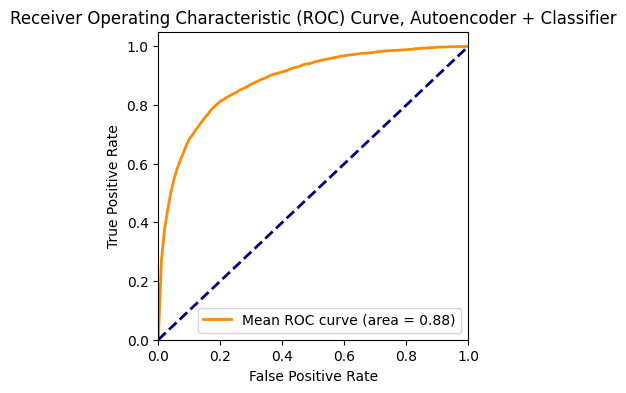

Mean Confusion Matrix at 0.6:
[[2.08082333e+05 3.66666667e+00]
 [1.62233333e+03 6.66666667e+00]]

Mean Confusion Matrix at 0.7:
[[2.08085333e+05 6.66666667e-01]
 [1.62600000e+03 3.00000000e+00]]


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of folds
num_folds = 3

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Initialize variables for ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

# Initialize variables for confusion matrices
all_conf_matrix_06 = np.zeros((2, 2))
all_conf_matrix_07 = np.zeros((2, 2))

# Iterate over folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train), 1):
    print(f'Fold {fold}')

    # Create autoencoder model
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(units=32, activation='relu')(input_layer)
    decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder on the current fold
    autoencoder.fit(X_train[train_indices], X_train[train_indices], epochs=10, batch_size=32, validation_data=(X_train[val_indices], X_train[val_indices]))

    # Create the encoder part of the autoencoder
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Create the classification model using the encoder
    model = Sequential()
    model.add(encoder)
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Extract training and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train.values[train_indices], y_train.values[val_indices]  # Use .values to get the numpy array

    # Train the classification model for this fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the classification model on the validation set for this fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    loss_scores.append(scores[0])
    accuracy_scores.append(scores[1])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    mean_tpr += np.interp(all_fpr, fpr, tpr)

    # Confusion Matrix at threshold 0.6
    threshold_06 = 0.6
    y_pred_binary_06 = (y_pred > threshold_06).astype(int)
    conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)
    all_conf_matrix_06 += conf_matrix_06

    # Confusion Matrix at threshold 0.7
    threshold_07 = 0.7
    y_pred_binary_07 = (y_pred > threshold_07).astype(int)
    conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)
    all_conf_matrix_07 += conf_matrix_07

# Calculate mean ROC curve
mean_tpr /= num_folds
roc_auc = auc(all_fpr, mean_tpr)

# Plot mean ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Display mean Confusion Matrices
print("Mean Confusion Matrix at 0.6:")
print(all_conf_matrix_06 / num_folds)

print("\nMean Confusion Matrix at 0.7:")
print(all_conf_matrix_07 / num_folds)

Fold 1
Epoch 1/10
17477/17477 [==============================] - 63s 4ms/step - loss: 0.5628 - val_loss: 0.5782
Epoch 2/10
17477/17477 [==============================] - 49s 3ms/step - loss: 0.5537 - val_loss: 0.5778
Epoch 3/10
17477/17477 [==============================] - 57s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 4/10
17477/17477 [==============================] - 57s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 5/10
17477/17477 [==============================] - 49s 3ms/step - loss: 0.5534 - val_loss: 0.5777
Epoch 6/10
17477/17477 [==============================] - 51s 3ms/step - loss: 0.5533 - val_loss: 0.5776
Epoch 7/10
17477/17477 [==============================] - 50s 3ms/step - loss: 0.5532 - val_loss: 0.5775
Epoch 8/10
17477/17477 [==============================] - 50s 3ms/step - loss: 0.5532 - val_loss: 0.5775
Epoch 9/10
17477/17477 [==============================] - 58s 3ms/step - loss: 0.5532 - val_loss: 0.5775
Epoch 10/10
17477/17477 [=======================

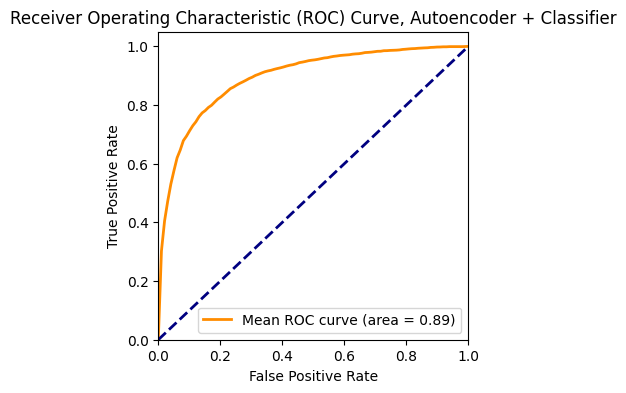

Mean Confusion Matrix at 0.6:
[[2.08044e+05 4.20000e+01]
 [1.53500e+03 9.40000e+01]]

Mean Confusion Matrix at 0.7:
[[2.08065333e+05 2.06666667e+01]
 [1.56566667e+03 6.33333333e+01]]


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of folds
num_folds = 3

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Initialize variables for ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

# Initialize variables for confusion matrices
all_conf_matrix_06 = np.zeros((2, 2))
all_conf_matrix_07 = np.zeros((2, 2))

# Iterate over folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train), 1):
    print(f'Fold {fold}')

    # Create autoencoder model
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(units=32, activation='relu')(input_layer)
    decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder on the current fold
    autoencoder.fit(X_train[train_indices], X_train[train_indices], epochs=10, batch_size=32, validation_data=(X_train[val_indices], X_train[val_indices]))

    # Create the encoder part of the autoencoder
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Create the classification model using the encoder
    model = Sequential()
    model.add(encoder)
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Extract training and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train.values[train_indices], y_train.values[val_indices]  # Use .values to get the numpy array

    # Train the classification model for this fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the classification model on the validation set for this fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    loss_scores.append(scores[0])
    accuracy_scores.append(scores[1])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    mean_tpr += np.interp(all_fpr, fpr, tpr)

    # Confusion Matrix at threshold 0.6
    threshold_06 = 0.6
    y_pred_binary_06 = (y_pred > threshold_06).astype(int)
    conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)
    all_conf_matrix_06 += conf_matrix_06

    # Confusion Matrix at threshold 0.7
    threshold_07 = 0.7
    y_pred_binary_07 = (y_pred > threshold_07).astype(int)
    conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)
    all_conf_matrix_07 += conf_matrix_07

# Calculate mean ROC curve
mean_tpr /= num_folds
roc_auc = auc(all_fpr, mean_tpr)

# Plot mean ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Display mean Confusion Matrices
print("Mean Confusion Matrix at 0.6:")
print(all_conf_matrix_06 / num_folds)

print("\nMean Confusion Matrix at 0.7:")
print(all_conf_matrix_07 / num_folds)

Epoch 1/10
20972/20972 [==============================] - 79s 4ms/step - loss: 0.6030 - val_loss: 0.5878
Epoch 2/10
20972/20972 [==============================] - 73s 3ms/step - loss: 0.5928 - val_loss: 0.5874
Epoch 3/10
20972/20972 [==============================] - 71s 3ms/step - loss: 0.5926 - val_loss: 0.5873
Epoch 4/10
20972/20972 [==============================] - 70s 3ms/step - loss: 0.5925 - val_loss: 0.5873
Epoch 5/10
20972/20972 [==============================] - 68s 3ms/step - loss: 0.5925 - val_loss: 0.5873
Epoch 6/10
20972/20972 [==============================] - 73s 3ms/step - loss: 0.5925 - val_loss: 0.5872
Epoch 7/10
20972/20972 [==============================] - 70s 3ms/step - loss: 0.5924 - val_loss: 0.5871
Epoch 8/10
20972/20972 [==============================] - 71s 3ms/step - loss: 0.5924 - val_loss: 0.5871
Epoch 9/10
20972/20972 [==============================] - 68s 3ms/step - loss: 0.5924 - val_loss: 0.5871
Epoch 10/10
20972/20972 [==============================

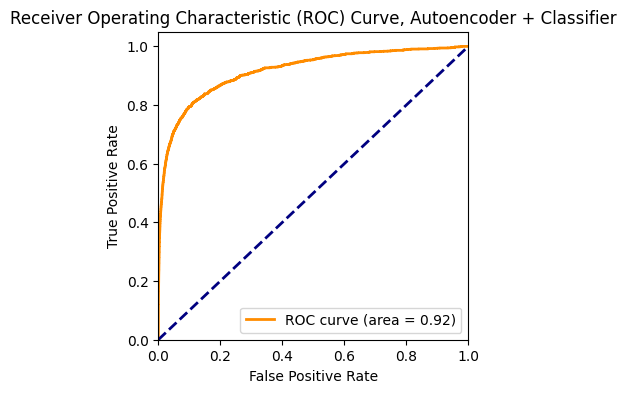

Confusion Matrix at 0.6:
[[208052     34]
 [  1503    126]]

Confusion Matrix at 0.7:
[[208078      8]
 [  1566     63]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=32, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)


In [3]:
# Dummy data
X_train_dummy = np.random.rand(100, 10)  # Replace with your actual data
y_train_dummy = np.random.randint(2, size=100)  # Replace with your actual labels
X_test_dummy = np.random.rand(50, 10)  # Replace with your actual test data
y_test_dummy = np.random.randint(2, size=50)  # Replace with your actual test labels

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of folds
num_folds = 3

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Iterate over folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train_dummy, y_train_dummy), 1):
    print(f'Fold {fold}')

    # Create autoencoder model
    input_layer = Input(shape=(X_train_dummy.shape[1],))
    encoded = Dense(units=32, activation='relu')(input_layer)
    decoded = Dense(units=X_train_dummy.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)

    # Create the encoder part of the autoencoder
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Create the classification model using the encoder
    model = Sequential()
    model.add(encoder)
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))



Fold 1
Fold 2
Fold 3


Fold 1
Epoch 1/10
17477/17477 [==============================] - 66s 4ms/step - loss: 0.6564 - val_loss: 0.6134
Epoch 2/10
17477/17477 [==============================] - 68s 4ms/step - loss: 0.6449 - val_loss: 0.6127
Epoch 3/10
17477/17477 [==============================] - 61s 3ms/step - loss: 0.6445 - val_loss: 0.6124
Epoch 4/10
17477/17477 [==============================] - 69s 4ms/step - loss: 0.6443 - val_loss: 0.6123
Epoch 5/10
17477/17477 [==============================] - 70s 4ms/step - loss: 0.6443 - val_loss: 0.6125
Epoch 6/10
17477/17477 [==============================] - 69s 4ms/step - loss: 0.6443 - val_loss: 0.6123
Epoch 7/10
17477/17477 [==============================] - 62s 4ms/step - loss: 0.6443 - val_loss: 0.6124
Epoch 8/10
17477/17477 [==============================] - 62s 4ms/step - loss: 0.6443 - val_loss: 0.6126
Epoch 9/10
17477/17477 [==============================] - 63s 4ms/step - loss: 0.6443 - val_loss: 0.6123
Epoch 10/10
17477/17477 [=======================

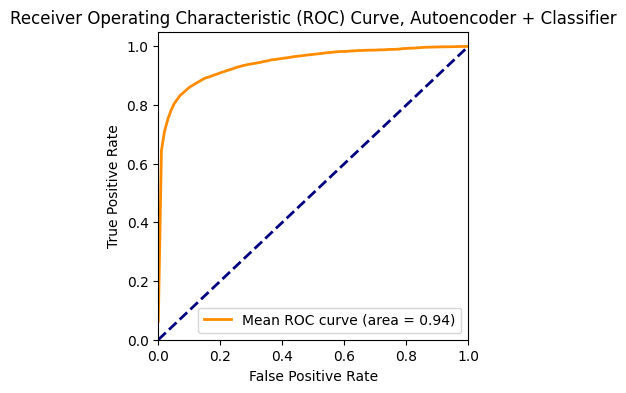

Mean Confusion Matrix at 0.6:
[[2.07955333e+05 1.30666667e+02]
 [1.01700000e+03 6.12000000e+02]]

Mean Confusion Matrix at 0.7:
[[2.07994667e+05 9.13333333e+01]
 [1.07566667e+03 5.53333333e+02]]


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of folds
num_folds = 3

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
accuracy_scores = []
loss_scores = []

# Initialize variables for ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

# Initialize variables for confusion matrices
all_conf_matrix_06 = np.zeros((2, 2))
all_conf_matrix_07 = np.zeros((2, 2))

# Iterate over folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train), 1):
    print(f'Fold {fold}')

    # Create autoencoder model
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(units=32, activation='relu')(input_layer)
    decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder on the current fold
    autoencoder.fit(X_train[train_indices], X_train[train_indices], epochs=10, batch_size=32, validation_data=(X_train[val_indices], X_train[val_indices]))

    # Create the encoder part of the autoencoder
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Create the classification model using the encoder
    model = Sequential()
    model.add(encoder)
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Extract training and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_indices], X_train[val_indices]
    y_train_fold, y_val_fold = y_train.values[train_indices], y_train.values[val_indices]  # Use .values to get the numpy array

    # Train the classification model for this fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the classification model on the validation set for this fold
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    loss_scores.append(scores[0])
    accuracy_scores.append(scores[1])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve for this fold
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    mean_tpr += np.interp(all_fpr, fpr, tpr)

    # Confusion Matrix at threshold 0.6
    threshold_06 = 0.6
    y_pred_binary_06 = (y_pred > threshold_06).astype(int)
    conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)
    all_conf_matrix_06 += conf_matrix_06

    # Confusion Matrix at threshold 0.7
    threshold_07 = 0.7
    y_pred_binary_07 = (y_pred > threshold_07).astype(int)
    conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)
    all_conf_matrix_07 += conf_matrix_07

# Calculate mean ROC curve
mean_tpr /= num_folds
roc_auc = auc(all_fpr, mean_tpr)

# Plot mean ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Display mean Confusion Matrices
print("Mean Confusion Matrix at 0.6:")
print(all_conf_matrix_06 / num_folds)

print("\nMean Confusion Matrix at 0.7:")
print(all_conf_matrix_07 / num_folds)

In [ ]:
model.save('fraud_detect_revoult12.h5')
from google.colab import files

files.download('fraud_detect_revoult12.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/10
20972/20972 [==============================] - 76s 4ms/step - loss: 0.6450 - val_loss: 0.6303
Epoch 2/10
20972/20972 [==============================] - 75s 4ms/step - loss: 0.6352 - val_loss: 0.6297
Epoch 3/10
20972/20972 [==============================] - 71s 3ms/step - loss: 0.6350 - val_loss: 0.6297
Epoch 4/10
20972/20972 [==============================] - 71s 3ms/step - loss: 0.6350 - val_loss: 0.6303
Epoch 5/10
20972/20972 [==============================] - 70s 3ms/step - loss: 0.6350 - val_loss: 0.6297
Epoch 6/10
20972/20972 [==============================] - 72s 3ms/step - loss: 0.6349 - val_loss: 0.6296
Epoch 7/10
20972/20972 [==============================] - 75s 4ms/step - loss: 0.6349 - val_loss: 0.6297
Epoch 8/10
20972/20972 [==============================] - 72s 3ms/step - loss: 0.6349 - val_loss: 0.6295
Epoch 9/10
20972/20972 [==============================] - 72s 3ms/step - loss: 0.6349 - val_loss: 0.6295
Epoch 10/10
20972/20972 [==============================

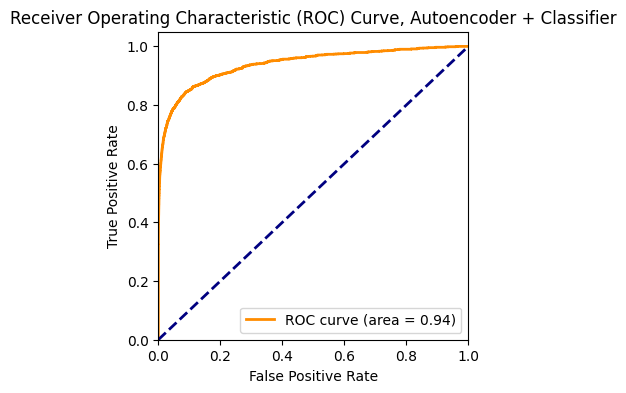

Confusion Matrix at 0.6:
[[207984    102]
 [  1040    589]]

Confusion Matrix at 0.7:
[[208025     61]
 [  1114    515]]


In [ ]:
 # Set random seed for reproducibility
np.random.seed(42)

# Create autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(units=32, activation='relu')(input_layer)
decoded = Dense(units=X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Create the encoder part of the autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)

# Create the classification model using the encoder
model = Sequential()
model.add(encoder)
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the classification model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Autoencoder + Classifier')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix at threshold 0.6
threshold_06 = 0.6
y_pred_binary_06 = (y_pred > threshold_06).astype(int)
conf_matrix_06 = confusion_matrix(y_test, y_pred_binary_06)

# Confusion Matrix at threshold 0.7
threshold_07 = 0.7
y_pred_binary_07 = (y_pred > threshold_07).astype(int)
conf_matrix_07 = confusion_matrix(y_test, y_pred_binary_07)

# Display Confusion Matrices
print("Confusion Matrix at 0.6:")
print(conf_matrix_06)

print("\nConfusion Matrix at 0.7:")
print(conf_matrix_07)
